## Correcting For Distortion

![Distorted and Undistorted Images](orig-and-undist.png)

Here, you'll get a chance to try camera calibration and distortion correction for yourself!  

There are two main steps to this process: use chessboard images to obtain image points and object points, and then use the OpenCV functions `cv2.calibrateCamera()` and `cv2.undistort()` to compute the calibration and undistortion.  

Unfortunately, we can't perform the extraction of object points and image points in the browser quiz editor, so we provide these for you in the quiz below.  

Try computing the calibration and undistortion in the exercise below, and if you want to play with extracting object points and image points yourself, fork the Jupyter notebook and images in [this repository](https://github.com/udacity/CarND-Camera-Calibration). You can also download the [distortion pickle file](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/files/Advanced_Lane_Finding_Images/correct_for_distortion/wide_dist_pickle.p) and [test image](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/files/Advanced_Lane_Finding_Images/correct_for_distortion/test_image.png) used in the below quiz if you'd like to run the below code on your own machine.

If you run into any *errors* as you run your code, please refer to the **Examples of Useful Code** section in the previous video and make sure that your code syntax matches up!

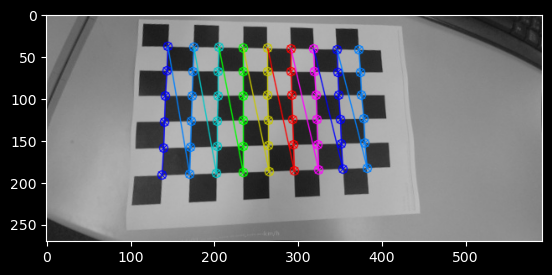

In [2]:
%matplotlib inline

import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.


BOARD_SIZE = (6,9)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(7,5,0)
objp = np.hstack((np.mgrid[0:BOARD_SIZE[0],0:BOARD_SIZE[1]].T.reshape(-1,2),np.zeros((BOARD_SIZE[0] * BOARD_SIZE[1],1), dtype=np.float32)))

uncal_img = mpimg.imread("./distorted.jpeg")

# Convert the image to a 3-channel image
uncal_img = cv2.cvtColor(uncal_img, cv2.COLOR_RGB2BGR)

# Find the chessboard corners
# cv2.CALIB_CB_ADAPTIVE_THRESH Use adaptive thresholding to convert the image to black and white, rather than a fixed threshold level (computed from the average image brightness).
# cv2.CALIB_CB_NORMALIZE_IMAGE Normalize the image gamma with equalizeHist() before applying fixed or adaptive thresholding.
# cv2.CALIB_CB_FAST_CHECK Run a fast check on the image that looks for chessboard corners, and shortcut the call if none is found. This can drastically speed up the call in the degenerate condition when no chessboard is observed.
ret, corners = cv2.findChessboardCorners(uncal_img, BOARD_SIZE,  cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

if ret:
    imgpoints.append(corners)
    objpoints.append(objp)
    
    # Draw and display the corners
    img = cv2.drawChessboardCorners(uncal_img, BOARD_SIZE, corners, ret)
    plt.imshow(img)


(960, 1280, 3)
rms=0.5662874944101881
, camera_mtx=array([[560.33468243,   0.        , 651.26269237],
       [  0.        , 561.37973145, 499.06652492],
       [  0.        ,   0.        ,   1.        ]])
, dist=array([[-2.32951777e-01,  6.17256346e-02, -1.83274571e-05,
         3.39255772e-05, -7.54987702e-03]])
, rvecs=(array([[ 0.09308084],
       [-0.32464563],
       [-0.02490234]]), array([[ 0.11260196],
       [-0.18662517],
       [-0.03802293]]), array([[ 0.05157993],
       [ 0.02649835],
       [-0.01095279]]), array([[ 0.14101626],
       [-0.03899637],
       [ 0.00317132]]), array([[0.08922158],
       [0.28760296],
       [0.00591943]]), array([[0.14841607],
       [0.19129028],
       [0.03749722]]), array([[ 0.29552223],
       [-0.39705337],
       [-0.20158414]]), array([[ 0.45379007],
       [-0.05701789],
       [-0.01006259]]), array([[ 0.34138088],
       [-0.02711319],
       [-0.01567581]]), array([[ 0.11145999],
       [-0.05243041],
       [-0.01676855]]), ar

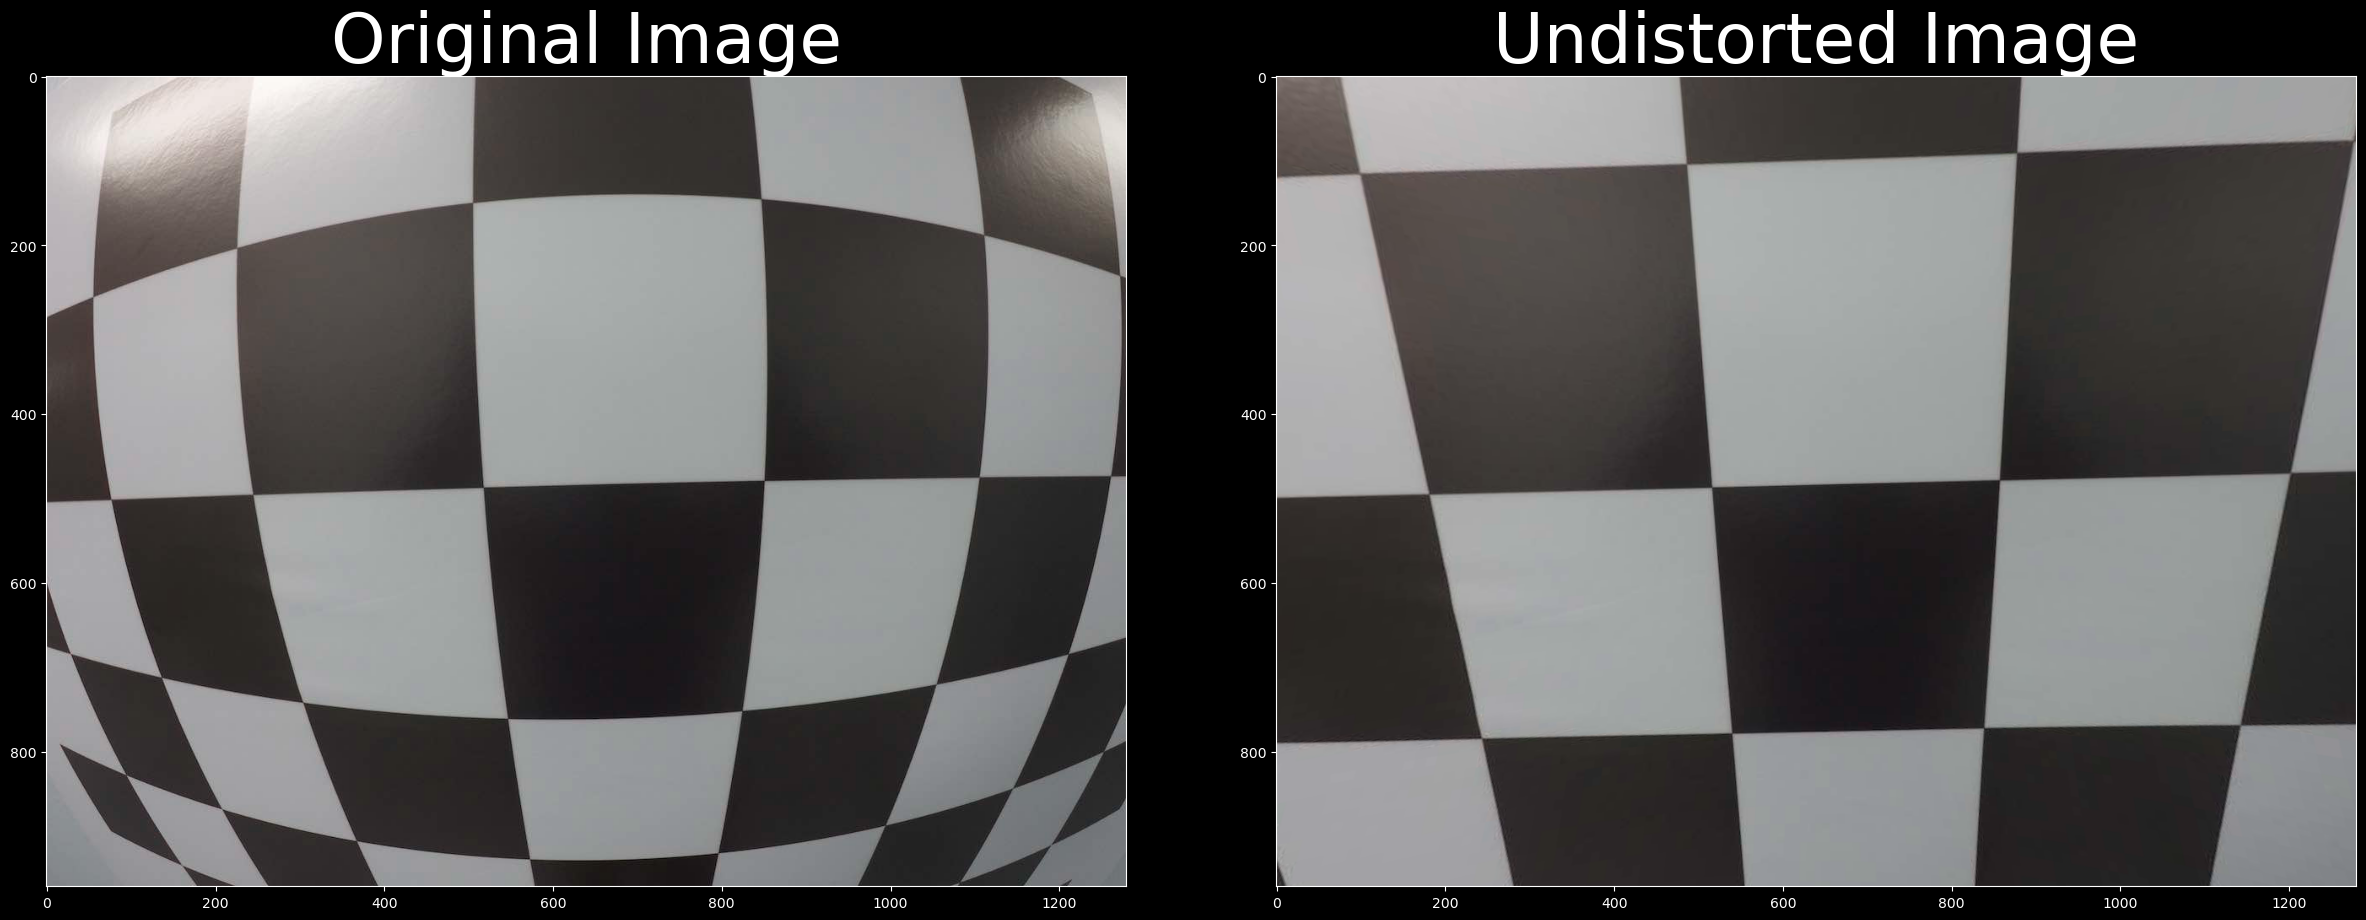

In [3]:
# Read in the saved objpoints and imgpoints
#
dist_pickle = pickle.load(open("wide_dist_pickle.p", "rb"))
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

# Read in an image
img = cv2.imread("test_image.png")
print(img.shape)


# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # cv2.calibrateCamera() returns the
    # - rms: the root mean square (RMS) re-projection error
    # - camera matrix: used to transform 3D object points to 2D image points
    # - distortion coefficients: used to undistort images
    # - rotation and translation vectors: used to transform 3D object points to 3D camera coordinate system
    rms, camera_mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
        objpoints, imgpoints, img.shape[0:2], None, None
    )
    print(f"{rms=}\n, {camera_mtx=}\n, {dist=}\n, {rvecs=}\n, {tvecs=}")
    undistorted_img = cv2.undistort(img, camera_mtx, dist, camera_mtx)
    return undistorted_img


undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title("Original Image", fontsize=50)
ax2.imshow(undistorted)
ax2.set_title("Undistorted Image", fontsize=50)
plt.subplots_adjust(left=0.0, right=1, top=0.9, bottom=0.0)
plt.show()

You can test your code by running the cell below when you feel satisfied with your results.

In [138]:
import test_calibration

test_calibration.test(undistorted)

'Correct! Nice work.'